In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import re
import itertools
import os
import pandas as pd
import numpy as np

In [3]:
import numpy as np
import json
import os
import re
import pandas as pd
from src import ingestion
from src import matrix

In [54]:
from src import baseline
from src import ingestion
from src import matrix

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#parse configuration
with open('config/data-params.json') as f:
    train = json.load(f)
sitemap = train['sitemap']
train_outpath = train['outpath']
num = train['num']
cat = train['categories']

In [7]:
cat

['dating', 'education']

In [8]:
date_apps= os.listdir(train_outpath+'/'+cat[0])
educ_apps=os.listdir(train_outpath+'/'+cat[1])


In [55]:
date_smalis = [ingestion.smalis_from_paths(ingestion.get_smali_paths(train_outpath+'/'+cat[0]+'/'+date_apps[i])) for i in range(len(date_apps))]
educ_smalis = [ingestion.smalis_from_paths(ingestion.get_smali_paths(train_outpath+'/'+cat[1]+'/'+educ_apps[i])) for i in range(len(educ_apps))]




In [58]:
smalis = pd.DataFrame(date_smalis+educ_smalis)
apis = smalis.apply(matrix.smali2apis, axis = 1)

In [60]:
A, classes = matrix.construct_A(apis)

### EDA

In [69]:
api_count = pd.DataFrame(A.todense(), columns = classes).sum().to_frame()

In [77]:
print('Number of API calls that only appear once: '+str(len(api_count[api_count[0]==1])))

Number of API calls that only appear once: 314596


In [83]:
print('Number of API calls that are most common: '+str(len(api_count[api_count[0]==32])))

Number of API calls that are most common: 530


In [11]:
df_date = baseline.extract_simple_feat(date_apps, train_outpath +'/dating/', 0, 'dating')
df_educ = baseline.extract_simple_feat(educ_apps, train_outpath +'/education/', 1, 'dating')

In [13]:
df = pd.concat([df_educ, df_date])

In [23]:
df_wona = df[df['num_api']!=0]
df_wona.describe()

,num_api,unique_api,num_method,unique_method,dating
count,32.000000,32.000000,32.000000,32.000000,32.000000
mean,145493.781250,28789.781250,43982.000000,41864.687500,0.562500
std,47349.130426,8777.898454,14036.671901,13278.649089,0.504016
min,28940.000000,5574.000000,6852.000000,6474.000000,0.000000
25%,106625.750000,21366.750000,33931.000000,32058.750000,0.000000
50%,162549.500000,32315.000000,51776.500000,49467.500000,1.000000
75%,179904.500000,35814.000000,53660.250000,51352.500000,1.000000
max,202134.000000,38282.000000,58251.000000,53935.000000,1.000000


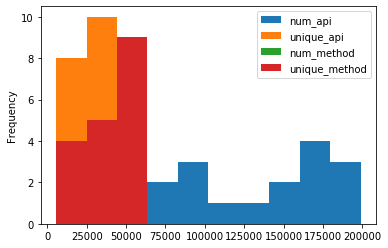

In [24]:
df_wona[df_wona['dating']==1].drop('dating',1).plot.hist()

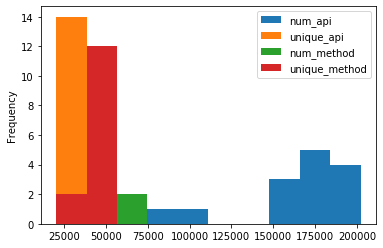

In [25]:
df_wona[df_wona['dating']==0].drop('dating',1).plot.hist()

In [26]:
df_wona.most_used_package.value_counts()

Ljava/lang/StringBuilder;    29
Landroid/os/Parcel;           3
Name: most_used_package, dtype: int64

### Baseline

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer


In [28]:
X = df_wona.drop('dating', 1)
y = df_wona.dating

In [42]:
pre = baseline.preprocess(X)

In [43]:
df_wona

,apps,num_api,unique_api,num_method,unique_method,most_used_package,dating
0,example.matharithmetics,100976,18701,28056,26744,Ljava/lang/StringBuilder;,1
2,com.studyblue,165465,35394,54804,52324,Ljava/lang/StringBuilder;,1
3,com.brainpop.brainpopfeaturedmovieandroid,83486,16997,23189,22145,Ljava/lang/StringBuilder;,1
4,com.vivitylabs.android.braintrainer,151615,35872,51934,50198,Landroid/os/Parcel;,1
5,com.infinitecampus.mobilePortal,79656,18060,24599,23777,Ljava/lang/StringBuilder;,1
6,org.coursera.android,182118,38282,55188,52546,Ljava/lang/StringBuilder;,1
7,com.MathUnderground.MathSolver,198877,34168,51619,49918,Ljava/lang/StringBuilder;,1
9,com.wendy,156086,33208,50544,48806,Ljava/lang/StringBuilder;,1
10,it.tinytap.market,168223,36880,53423,51295,Ljava/lang/StringBuilder;,1
11,com.gonliapps.learnspanish,136426,26321,38310,36625,Ljava/lang/StringBuilder;,1


In [2]:
result_LR = baseline.result_LR(df_wona, df_wona, pre, y_column = 'dating')
result_LR

NameError: name 'result_LR' is not defined

In [52]:
result_RF = baseline.result_RF(df_wona, df_wona, pre, y_column = 'dating')
result_RF 

(10, 4, 5, 13)

In [53]:
result_GBT = baseline.result_GBT(df_wona, df_wona, pre, y_column = 'dating')
result_GBT

(14, 0, 0, 18)